In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
#import CV2

In [3]:
import split_folders
from sklearn.model_selection import train_test_split

In [4]:
train_dir='Train'
test_dir='Test'

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [6]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(28,28),batch_size=50,class_mode='binary',subset='training')

Found 9600 images belonging to 2 classes.


In [7]:
train_data,train_label=next(train_generator)

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

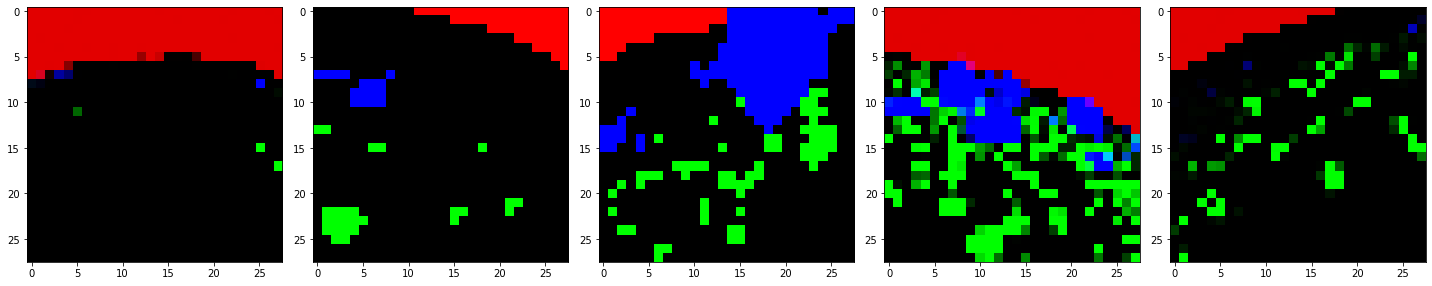

In [9]:
plotImages(train_data[:5]) 

In [10]:
validation_generator=train_datagen.flow_from_directory(train_dir,target_size=(28,28),batch_size=50,class_mode='binary',subset='validation')

Found 2398 images belonging to 2 classes.


In [25]:
type(train_generator[0][0][0])

numpy.ndarray

In [12]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

W1010 21:56:30.550263 139789430257472 deprecation.py:506] From /home/rohan/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W1010 21:56:40.316108 139789430257472 deprecation.py:323] From /home/rohan/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=10,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))

Epoch 1/10
192/192 [==============================] - 210s 1s/step - loss: 0.3575 - acc: 0.8396 - val_loss: 0.1937 - val_acc: 0.9124
Epoch 2/10
192/192 [==============================] - 56s 293ms/step - loss: 0.1470 - acc: 0.9429 - val_loss: 0.0922 - val_acc: 0.9691
Epoch 3/10
192/192 [==============================] - 59s 306ms/step - loss: 0.1048 - acc: 0.9622 - val_loss: 0.0653 - val_acc: 0.9804
Epoch 4/10
192/192 [==============================] - 57s 298ms/step - loss: 0.0618 - acc: 0.9777 - val_loss: 0.0560 - val_acc: 0.9775
Epoch 5/10
192/192 [==============================] - 58s 300ms/step - loss: 0.0523 - acc: 0.9811 - val_loss: 0.0684 - val_acc: 0.9771
Epoch 6/10
192/192 [==============================] - 57s 296ms/step - loss: 0.0400 - acc: 0.9847 - val_loss: 0.0252 - val_acc: 0.9900
Epoch 7/10
192/192 [==============================] - 56s 292ms/step - loss: 0.0259 - acc: 0.9892 - val_loss: 0.0228 - val_acc: 0.9908
Epoch 8/10
192/192 [==============================] - 59s

ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

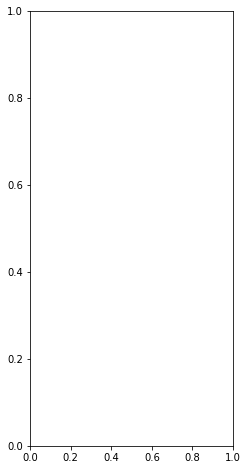

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [17]:
test=pd.read_csv('test.csv')

In [18]:
from keras.models import load_model
from keras.preprocessing import image

Using TensorFlow backend.


In [19]:

img = image.load_img('Test/'+i,target_size=(28,28,3))

NameError: name 'i' is not defined

In [21]:
images = [] 
for i in test['Image_File']:
    img = image.load_img('Test/'+i,target_size=(28,28,3))
    images.append(img)

In [26]:
images[0]

In [27]:
type(images[0])

PIL.Image.Image

In [46]:
pred=[]
for i in images:
    x=image.img_to_array(i)
    x=np.expand_dims(x,axis=0)
    x=x/255
    im=np.vstack([x])
    pre=model.predict(im,batch_size=32)
    pred.append(pre)

In [47]:
print(x)

[[[[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]
   ...
   [1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 1. 0.]
   [0. 1. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 1. 0.]
   [0. 1. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [49]:
len(pred)

7534

In [50]:
test.shape

(7534, 2)

In [51]:
for i in range(7534):
    if pred[i]>=0.5:
        pred[i]='Large'
    else:
        pred[i]='Small'

In [52]:
pred

['Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Small',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Small',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',
 'Large',


In [54]:
my_submission = pd.DataFrame({'Image_File': test.Image_File, 'Class': pred})

my_submission.to_csv('submission.csv', index=False)